In [150]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
sns.set()
sns.set_style('white')

In [151]:
data = loadmat('ex5data1.mat')
x = np.c_[np.ones((12, 1)), data['X']]
y = data['y']
xval = np.c_[np.ones((21, 1)), data['Xval']]
yval = data['yval']
xtest = np.c_[np.ones((21, 1)), data['Xtest']]
ytest = data['ytest']
m = y.shape[0]
initialTheta = [1, 1]

In [152]:
def regularizedCostFunction (theta, x, y, λ = 1):
    theta = np.array(theta).reshape(1, -1)
    h = np.dot(x, theta.T)
    j = 1 / (2 * m) * np.sum(np.square(h - y)) + λ / (2 * m) * np.square(theta[:, 1:])
    return j

In [153]:
def regularizedGradient (theta, x, y, λ = 1):
    theta = np.array(theta).reshape(1, -1)
    h = np.dot(x, theta.T)
    partialDerivative = (1 / m) * np.dot(x.T, (h - y)) + (λ / (2 * m) * theta[:, 1:])
    return partialDerivative.flatten()

In [154]:
def optimum (theta, x, y, λ):
    return sc.optimize.minimize(regularizedCostFunction, theta, args = (x, y, 0), method = 'CG', jac = regularizedGradient, options={'maxiter' : 200})

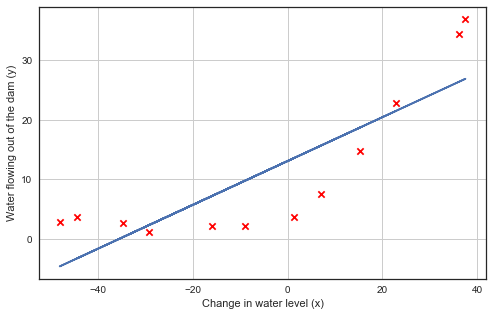

In [166]:
minimize = optimum(initialTheta, x, y, 0)
plt.figure(figsize=(8,5))
plt.scatter(x[:, 1:], y, s = 40, c = 'r', marker = 'x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(x[:, 1:], x.dot(minimize.x))
plt.grid(True)

In [156]:
def learningCurves (x, y, xval, yval, λ):
    errorTrain = []
    errorVal = []
    for number in range(2, 13):
        xTrain = x[:number, :]
        yTrain = y[:number]
        thetaFit = optimum(initialTheta, xTrain, yTrain, 0).x
        costTrain = regularizedCostFunction(thetaFit, xTrain, yTrain, 0)
        costVal = regularizedCostFunction(thetaFit, xval, yval, 0)
        errorTrain.append(costTrain)
        errorVal.append(costVal)
    errorTrain = np.array(errorTrain).flatten()
    errorVal = np.array(errorVal).flatten()
    return (errorTrain, errorVal)

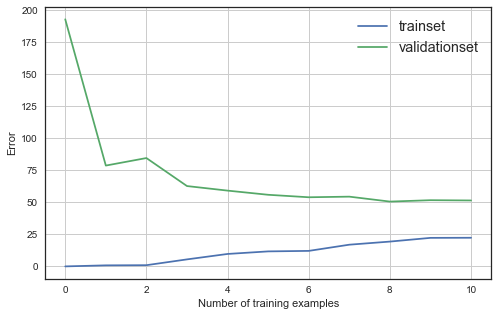

In [164]:
plt.figure(figsize=(8,5))
plt.plot(learningCurves(x, y, xval, yval, 0)[0], label = 'trainset')
plt.plot(learningCurves(x, y, xval, yval, 0)[1], label = 'validationset')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid(True)
plt.legend(fontsize = 'large')

In [224]:
def polynomialRegression (x, number):
    polynimailx = x.copy()
    for n in range(2, number):
        polynimailx = np.append(polynimailx, np.power(x[:, 1:], n), axis = 1)
    return polynimailx